<a href="https://colab.research.google.com/github/blackdragonae/mcmc/blob/main/mcmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MCMC code**

In [1]:
!pip install zeus-mcmc
!pip install getdist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.0/826.0 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for getdist: filename=getdist-1.4.8-py3-none-any.whl size=810431 sha256=3f883b39173da6eda5a68e46e4f4d4bacb8efe4c15aed6a83e9d485da49de45f
  Stored in directory: /root/.cache/pip/wheels/ba/db/c3/b71b37200117c3b4c68b8bb14c9e27ed36006205fa25ba0c40
Successfully built getdist


Importando librerias

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import os
import random
from astropy.table import Table
from astropy.cosmology import FlatwCDM
from getdist import plots, MCSamples
import zeus
from zeus import ChainManager
import numpy as np
import scipy.optimize as op
from multiprocessing import Pool

**Montecarlo Method to calcualte Pi**

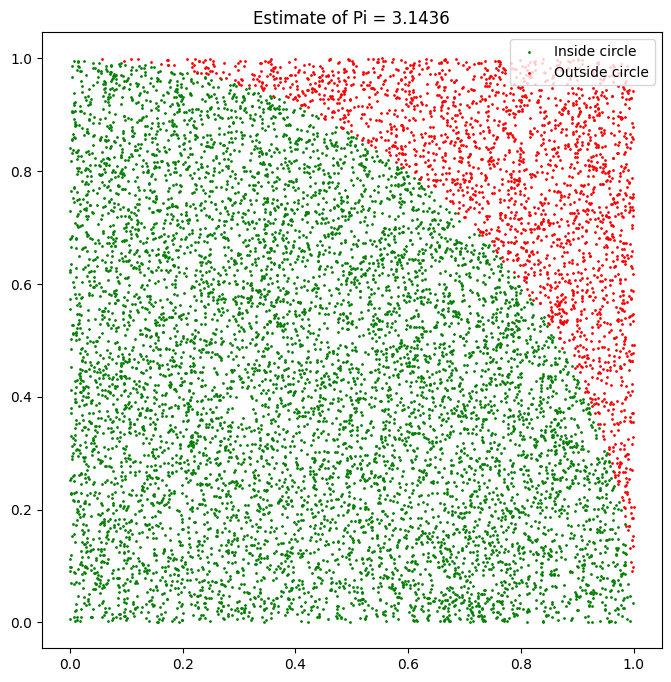

In [21]:
def estimate_pi(num_samples):
    inside_circle = 0
    inside_x = []
    inside_y = []
    outside_x = []
    outside_y = []

    for _ in range(num_samples):
        x, y = random.random(), random.random()
        if x**2 + y**2 <= 1:
            inside_circle += 1
            inside_x.append(x)
            inside_y.append(y)
        else:
            outside_x.append(x)
            outside_y.append(y)

    pi_estimate = 4 * inside_circle / num_samples
    return pi_estimate, inside_x, inside_y, outside_x, outside_y

# Number of samples
num_samples = 10000
pi_estimate, inside_x, inside_y, outside_x, outside_y = estimate_pi(num_samples)

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(inside_x, inside_y, color='green', s=1, label='Inside circle')
plt.scatter(outside_x, outside_y, color='red', s=1, label='Outside circle')
plt.legend()
plt.axis('equal')
plt.title(f'Estimate of Pi = {pi_estimate}')
plt.show()